In [49]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
audio_file = "chopin.wav"
y, sr = librosa.load(audio_file, sr=None)

# Calculate length of the audio file
length_seconds = librosa.get_duration(y=y, sr=sr)

# Calculate beats per minute (tempo)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

print("Length of the audio file: {:.2f} seconds".format(length_seconds))
print("Sample rate: {} Hz".format(sr))
print("Beats per minute (tempo): {:.2f} BPM".format(tempo))


Length of the audio file: 25.08 seconds
Sample rate: 44100 Hz
Beats per minute (tempo): 143.55 BPM


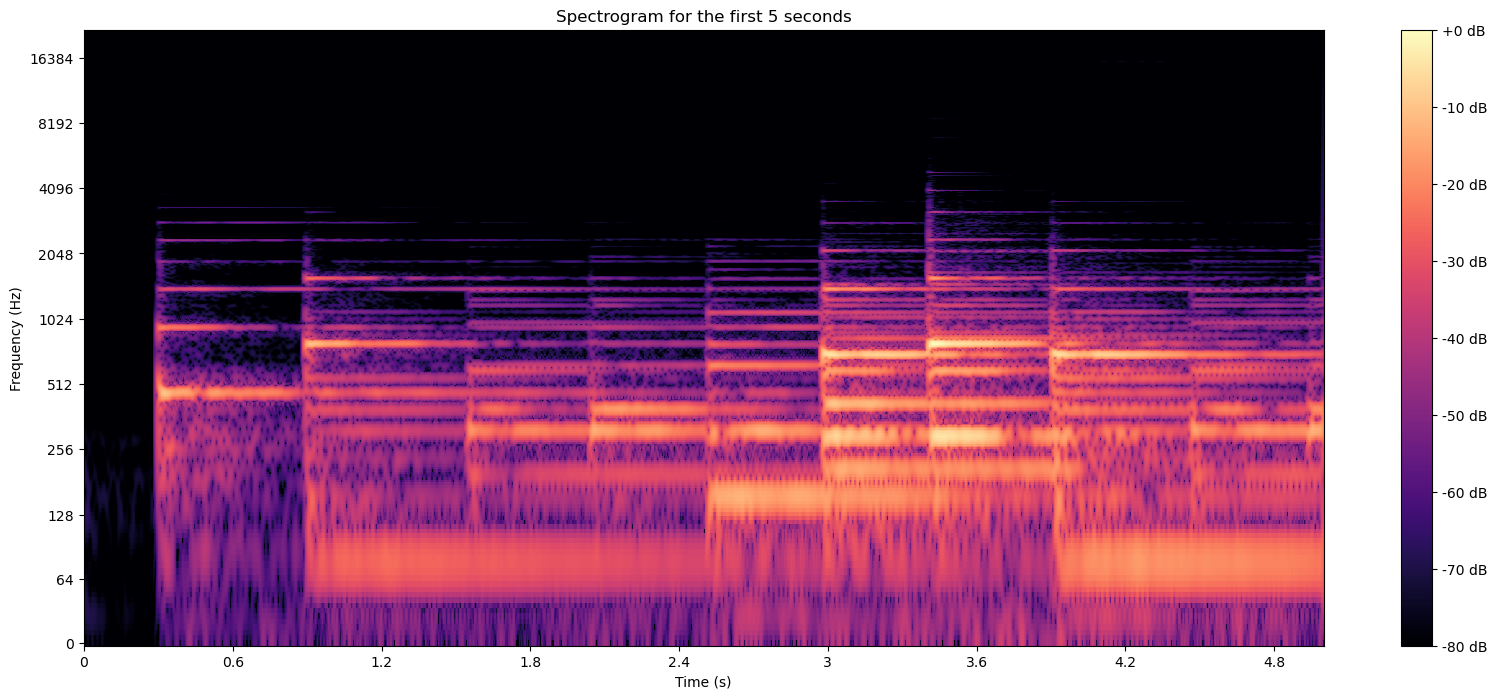

In [50]:
# Extract the first 5 seconds of the audio
y_5s = y[:sr*5]

# Compute the spectrogram with even higher resolution
n_fft = 8192  # Number of FFT bins
hop_length = 128  # Hop length
win_length = 2048  # Length of the window
D = librosa.stft(y_5s, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(20, 8))  # Double the original width and height
librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for the first 5 seconds')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


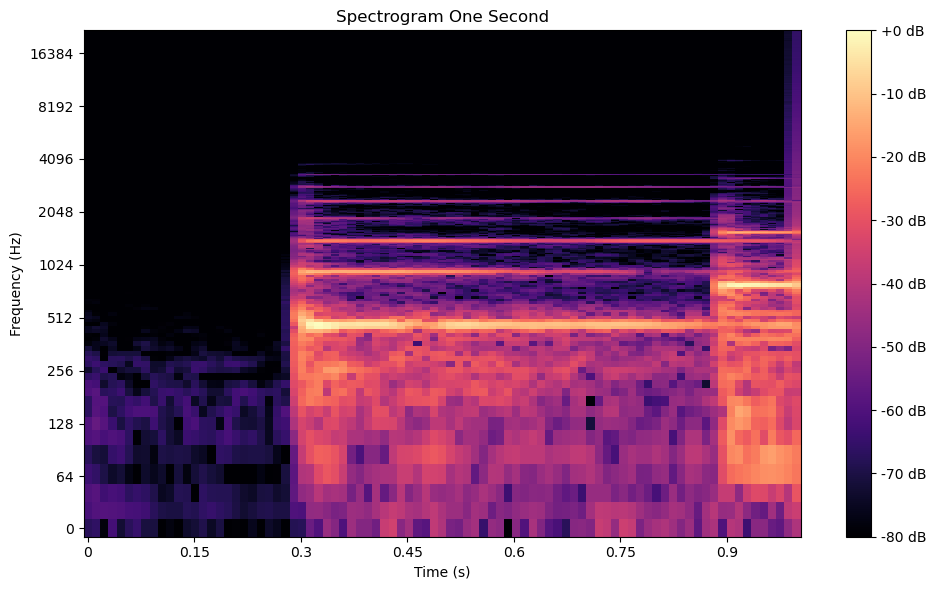

In [51]:
# Extract the first 0.5 seconds of the audio signal
duration = 1  # in seconds
y_short = y[:int(sr * duration)]

# Calculate the spectrogram
n_fft = 2048  # window size for the STFT
hop_length = 512  # hop length (stride)
spec = np.abs(librosa.stft(y_short, n_fft=n_fft, hop_length=hop_length))

# Plot the spectrogram with high resolution
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram One Second')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


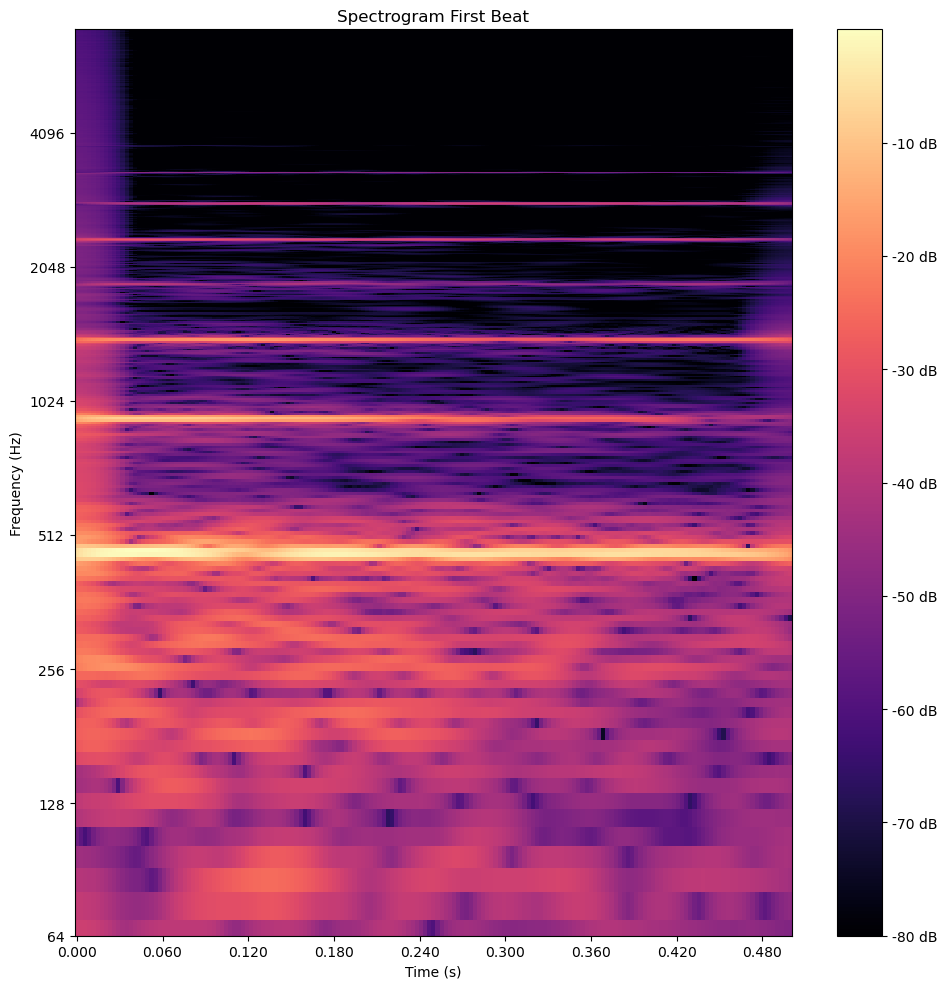

In [52]:
# Define the start and end times for the interval (in seconds)
start_time = 0.35
end_time = 0.85

# Convert the start and end times to sample indices
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

# Extract the audio segment within the specified time interval
y_segment = y[start_sample:end_sample]

# Calculate the spectrogram
n_fft = 4096  # window size for the STFT
hop_length = 128  # hop length (stride)
spec = np.abs(librosa.stft(y_segment, n_fft=n_fft, hop_length=hop_length))

# Plot the spectrogram with limited frequency range
plt.figure(figsize=(10, 10))
librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', fmax=4096)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram First Beat')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()

plt.ylim([64, 7000])

plt.show()


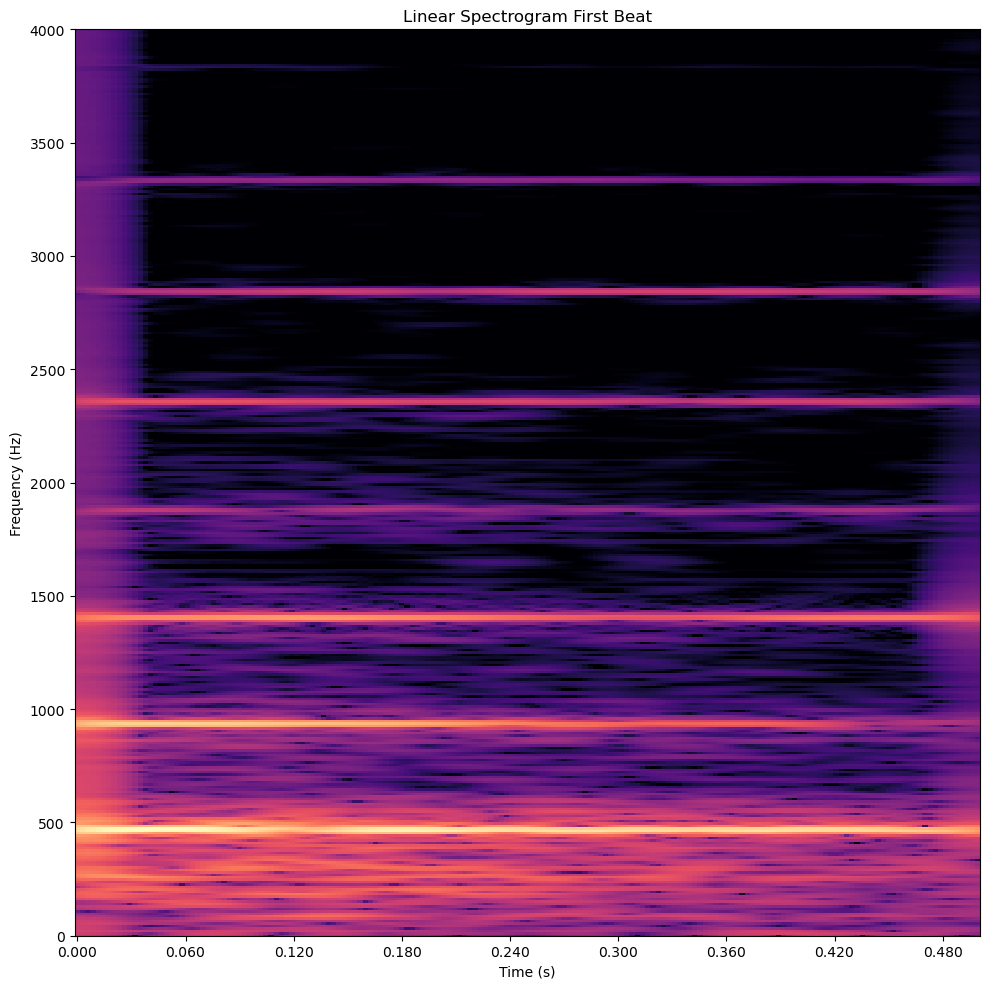

In [53]:
# Calculate the spectrogram
n_fft = 4096  # window size for the STFT
hop_length = 128  # hop length (stride)
spec = np.abs(librosa.stft(y_segment, n_fft=n_fft, hop_length=hop_length))

# Plot the spectrogram with limited frequency range and linear y-axis
plt.figure(figsize=(10, 10))  # Adjusted height
librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.title('Linear Spectrogram First Beat')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Limit the y-axis to 5 kHz
plt.ylim([0, 4000])

plt.tight_layout()
plt.show()


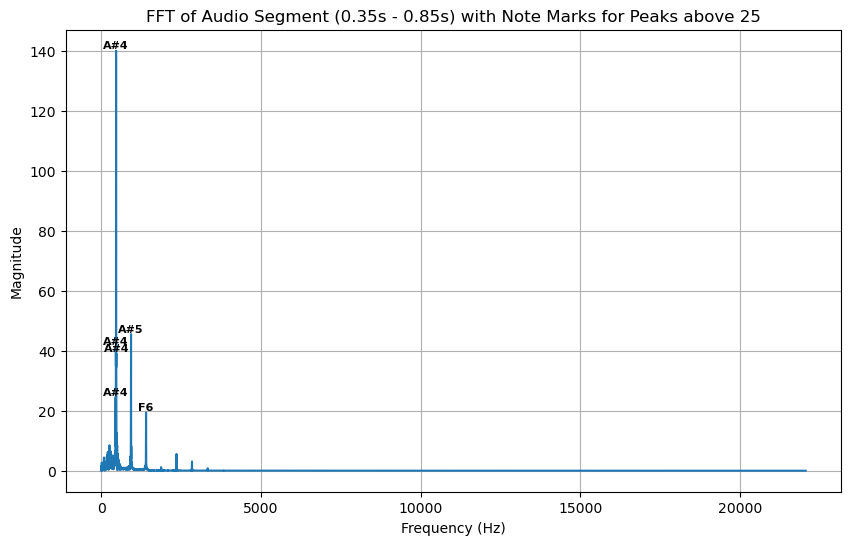

In [54]:
from scipy.signal import find_peaks

# Define a function to convert frequency to MIDI note number
def freq_to_midi(frequency):
    return 69 + 12 * np.log2(frequency / 440)

# Define a function to convert MIDI note numbers to note names
def midi_to_note(midi_note):
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    octave = (midi_note // 12) - 1
    note_name = notes[midi_note % 12]
    return f'{note_name}{octave}'

# Assuming y_segment is your audio signal and sr is the sampling rate

# Calculate the FFT of the audio segment
fft_result = np.fft.fft(y_segment)

# Frequency bins
freq_bins = np.fft.fftfreq(len(fft_result), d=1/sr)

# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(fft_result)[:len(freq_bins)//2]

# Find peaks in the magnitude spectrum above 25
peaks, _ = find_peaks(magnitude_spectrum, height=13)  # Adjust the threshold as needed

# Plot the FFT
plt.figure(figsize=(10, 6))
plt.plot(freq_bins[:len(freq_bins)//2], magnitude_spectrum)
plt.title('FFT of Audio Segment (0.35s - 0.85s) with Note Marks for Peaks above 25')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Annotate peaks with note names
for peak in peaks:
    freq = freq_bins[peak]
    mag = magnitude_spectrum[peak]
    midi_note = int(round(freq_to_midi(freq)))
    note_name = midi_to_note(midi_note)
    plt.text(freq, mag, f'{note_name}', fontsize=8, ha='center', va='bottom', color='black', weight='bold')

plt.show()
